# Úkoly

1. Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.


In [4]:
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

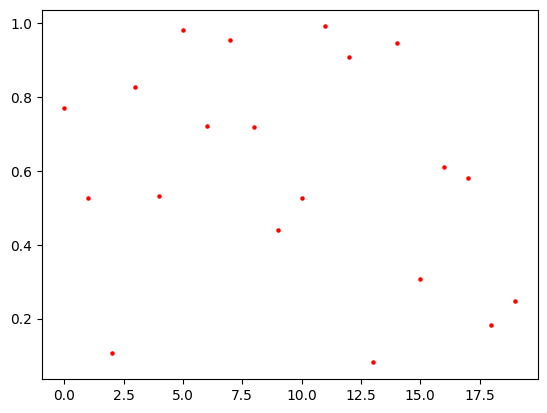

In [68]:
x = np.arange(20)
y = np.random.rand(20)
plt.scatter(x,y, s=5,color="red")


2. Vykreslete 3D graf s funkcí $$z = \frac{\sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$ Použijte `imshow` a `contour`.


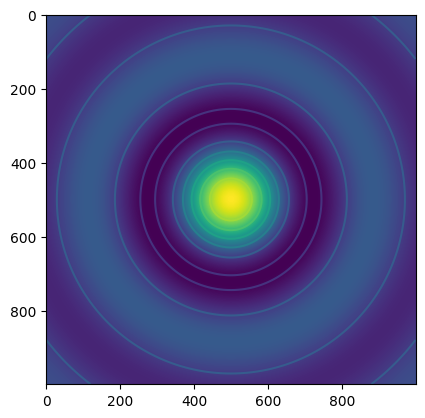

In [51]:
n = 1000
x = np.linspace(-10,10,n)
y = np.linspace(-10,10,n)
x,y = np.meshgrid(x,y)

z = (np.sin(np.sqrt(x*x + y*y)))/(np.sqrt(x*x + y*y))
plt.contour(z)
plt.imshow(z)

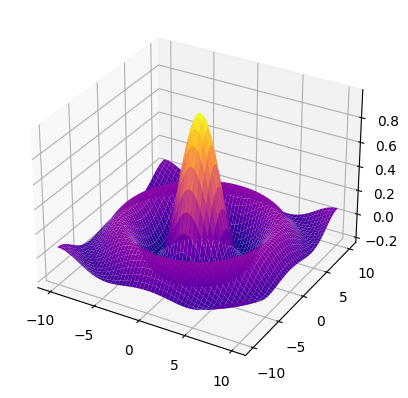

In [52]:
fig = plt.figure()

# `ax` je trojrozměrná osa (díky keyword argumentu projection)
ax = fig.add_subplot(projection='3d')

ax.plot_surface(x, y, z, cmap="plasma", antialiased="true")


3. Vykreslete polar graf s funkcí $r = 2\sin(3θ)$. Použijte funkci plot a nastavte barvu, osy a titulek.


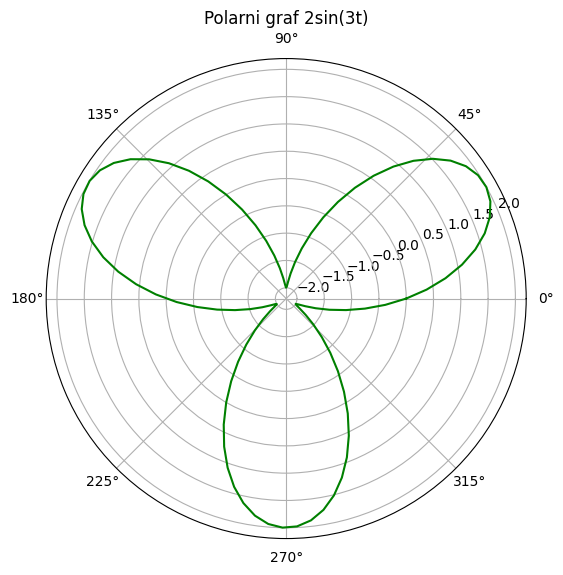

In [66]:
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
r = 2*np.sin(3*t)

ax.set_title("Polarni graf 2sin(3t)")
ax.plot(t, r, color='green')


4. Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.


<function matplotlib.pyplot.show(close=None, block=None)>

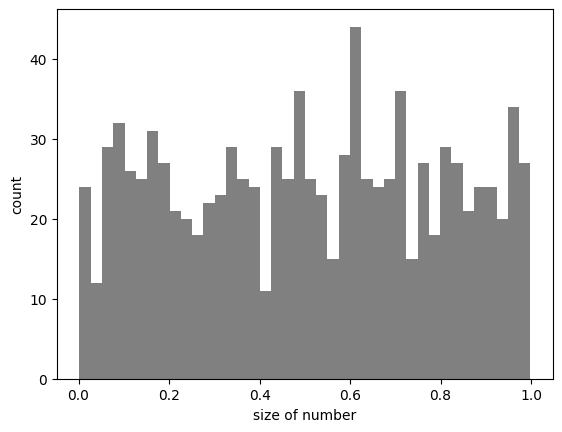

In [79]:
n = 1000
x = np.arange(n)
y = np.random.rand(n)
plt.xlabel("size of number")
plt.ylabel("count")
plt.hist(y,40, color="grey")
plt.show


5. Vytvořte 3D surf graf s funkcí $$z = \cos(\sqrt{x^2 + y^2})$$


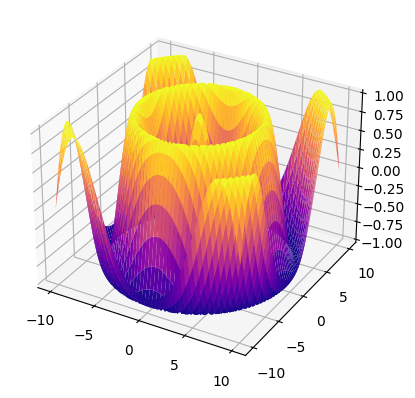

In [48]:
n = 1000
x = np.linspace(-10,10,n)
y = np.linspace(-10,10,n)
x,y = np.meshgrid(x,y)

z = np.cos(np.sqrt(x*x + y*y))

fig = plt.figure()

# `ax` je trojrozměrná osa (díky keyword argumentu projection)
ax = fig.add_subplot(projection='3d')

ax.plot_surface(x, y, z, cmap="plasma", antialiased="true")

# Domácí úkol
Použijte funkce z minulého úkolu `integer_spiral_numpy` a `integer_spiral`. 
1. Vykreslete spirálu (např pro n=101) a sinus hodnot ve spirále pomocí `imshow` a `contour`.
2. Měřte časy výpočtu pro `integer_spiral_numpy` a `integer_spiral` pro různé hodnoty mezi 11 a 1001 a porovnejte je.
3. Vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů výpočtů do jednoho grafu, nastavte popisky, legendu a osy.
4. Co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu? 
    - hint $g(x) = ax$ v log-log grafu ve skutečnosti znamená, že původní funkce vypadá: $\log (f(x)) = a \log(x)$, jaká je tedy $f(x)$?

In [5]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


def integer_spiral_numpy(n):
    #TODO naimplementujte viz zadání
    A = np.zeros((n+2,n+2),dtype=int)
    mid = n//2
    val = 1
    top,left,bottom,right = mid, mid, mid+1, mid+1
    while True:
        # prava hrana
        A[bottom:top:-1, right] = np.arange(val, val + bottom - top)
        val += bottom - top
        bottom +=1
        if val > n*n: break
        # vrchni hrana
        A[top, right:left-1:-1] = np.arange(val, val + right - left + 1)
        val += right - left + 1
        right +=1
        if val > n*n: break
        # leva hrana
        A[top+1:bottom+1, left] = np.arange(val, val + bottom - top)
        val += bottom - top
        top -= 1
        if val > n*n: break
        # spodni hrana
        A[bottom,left+1:right] = np.arange(val, val + right - left -1)
        val += right - left - 1
        left -= 1
        if val > n*n: break
        
    
    return A[1:-1,1:-1]

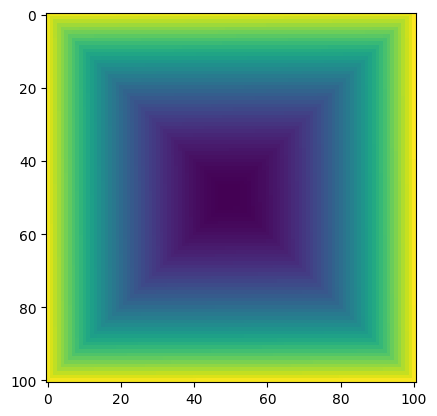

In [14]:
plt.imshow(integer_spiral(101))

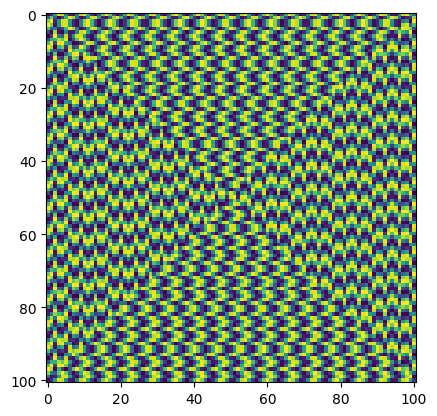

In [15]:
plt.imshow(np.sin(integer_spiral(101)))

In [38]:
import time
spiral_times = []
spiral_times_np = []
for i in range(11,1001,10):
    start = time.perf_counter()
    integer_spiral(i)
    end = time.perf_counter()
    spiral_times.append(end-start)

    start = time.perf_counter()
    integer_spiral_numpy(i)
    end = time.perf_counter()
    spiral_times_np.append(end-start)

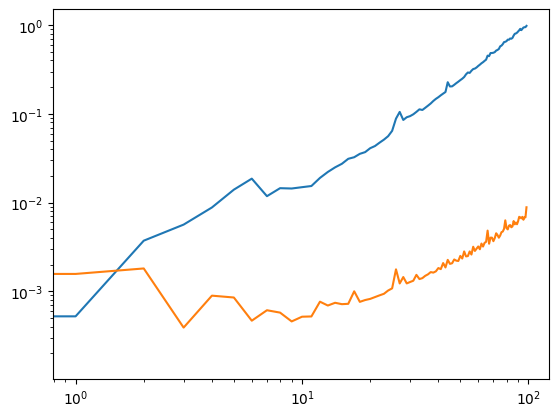

In [39]:
fig, axes = plt.subplots()
axes.loglog(spiral_times)
axes.loglog(spiral_times_np)

# Bonusový úkol
Použijte funkci `polyfit` z knihovny `numpy` pro logaritmicky transponované časy a počty prvků a zjistěte koeficient u lineární funkce při aproximaci polynomem 1. stupně.

Vykreslete lineární aproximace získané funkci `polyfit` do log-log grafu společne s naměřenými daty.